# **Pohon Klasifikasi**

In [ ]:
# ============================
# 1. IMPORT LIBRARY
# ============================
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve


In [ ]:
# ============================
# 2. LOAD DATASET
# ============================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Shape data:", X.shape)
X.head()

Shape data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts()
# 1 = Benign (jinak) → 357 sampel
# 0 = Malignant (ganas) → 212 sampel

,count
target,
1,357
0,212


In [ ]:
# ============================
# 3. TRAIN-TEST SPLIT
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (455, 30)
Test size: (114, 30)


In [ ]:
# ============================
# 4. MODEL DASAR DECISION TREE
# ============================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy (baseline):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy (baseline): 0.9122807017543859

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
# ============================
# 5. CONFUSION MATRIX
# ============================
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[39  3]
 [ 7 65]]


In [ ]:
# ============================
# 6. HYPERPARAMETER TUNING
# ============================

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.9384615384615385


In [ ]:
# ============================
# 7. EVALUASI MODEL TERBAIK
# ============================
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Accuracy (best model):", accuracy_score(y_test, y_pred_best))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy (best model): 0.9385964912280702

Confusion Matrix:
[[39  3]
 [ 4 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



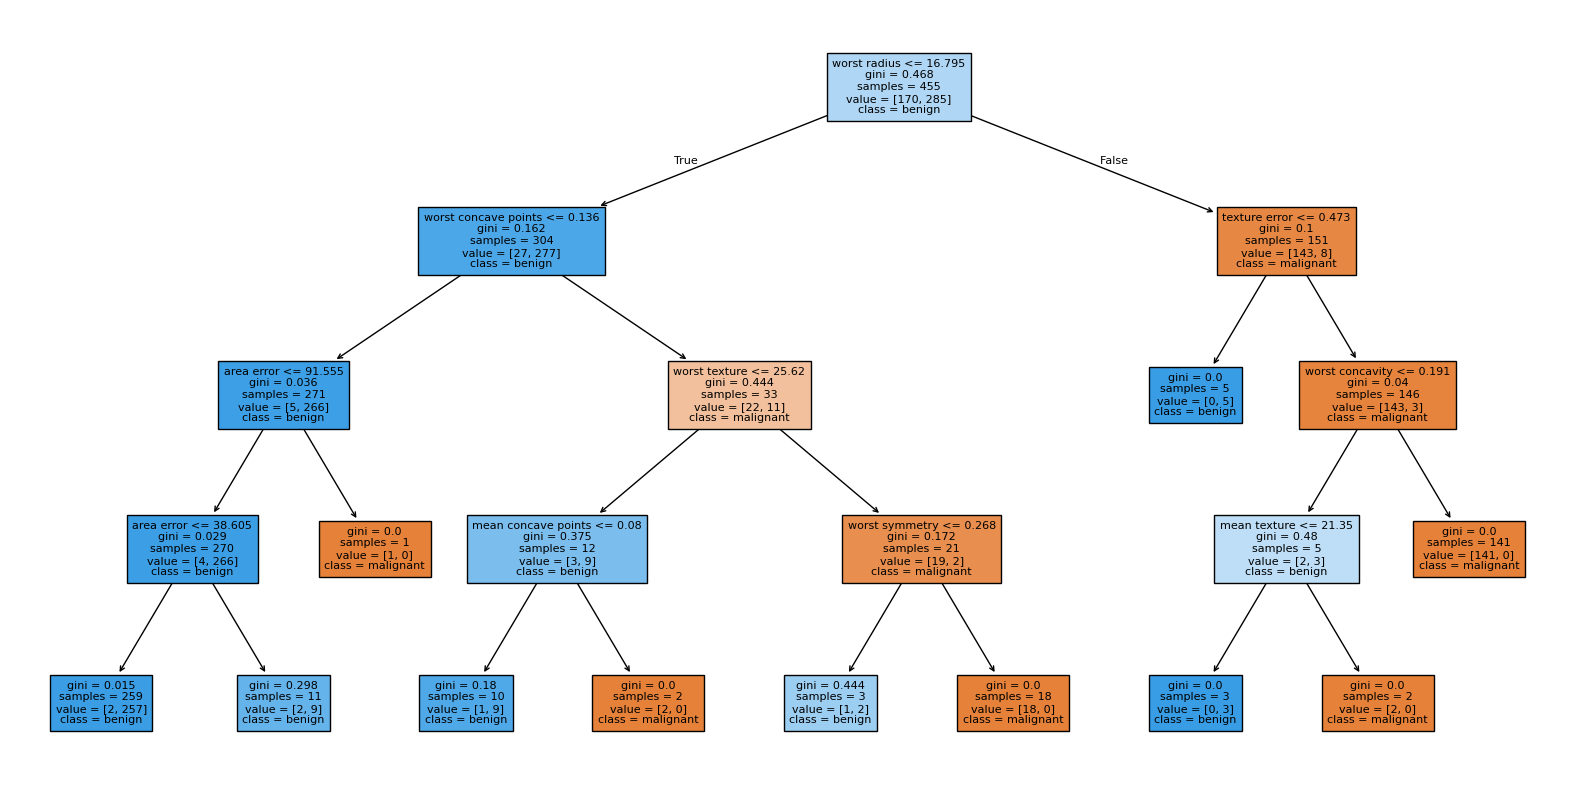

In [ ]:
# ============================
# 8. VISUALISASI POHON KLASIFIKASI
# ============================

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    filled=True,
    fontsize=8,
    feature_names=data.feature_names,
    class_names=data.target_names
)
plt.show()


In [ ]:
# ============================
# 7. EVALUASI MODEL TERBAIK
# ============================
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Prediksi
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,1
4,0
...,...
109,0
110,0
111,0
112,1


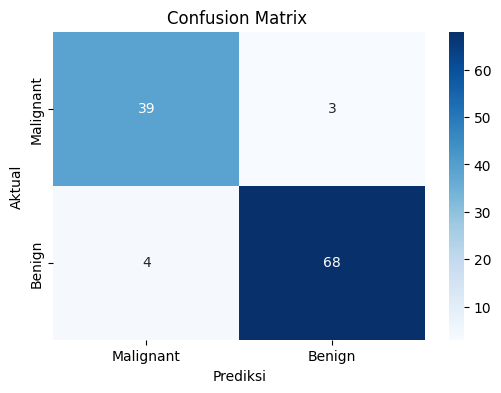

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix ")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()



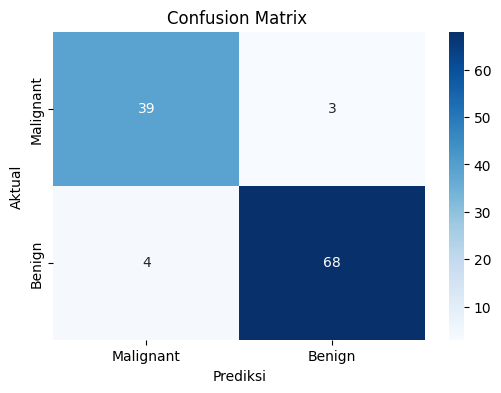

Akurasi        : 0.9386
Sensitivitas   : 0.9444
Spesifisitas   : 0.9286
F1-Score       : 0.9510
AUC            : 0.9342


In [ ]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix ")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Tampilkan semua hasil
print(f"Akurasi        : {accuracy:.4f}")
print(f"Sensitivitas   : {sensitivity:.4f}")
print(f"Spesifisitas   : {specificity:.4f}")
print(f"F1-Score       : {f1:.4f}")
print(f"AUC            : {auc:.4f}")

<p align="center">
 <img src="WhatsApp Image 2025-11-13 at 20.35.08.jpeg](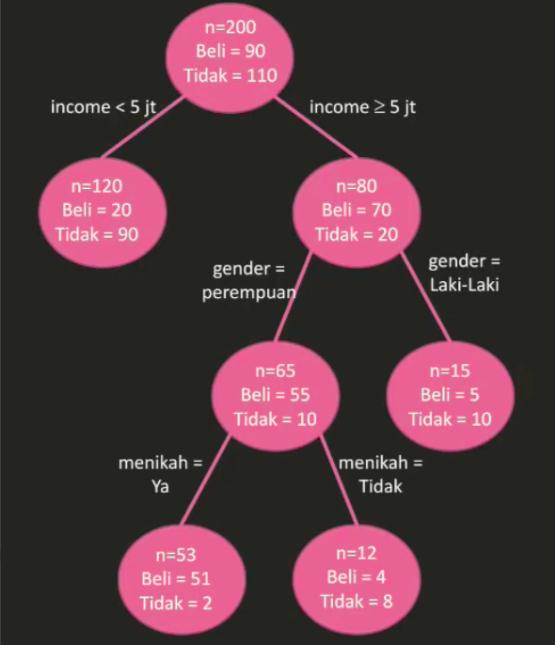"